## 特种工程第二章

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [6]:
listen_count_data = pd.read_csv("../datasets/train_triplets.txt.zip",
                                header=None,
                                delimiter='\t',
                                low_memory=True)
listen_count_data.head()

MemoryError: 

## Yelp 数据集的统计
- 有782种商户类别。
- 完整的数据集包含 1569264 个（约1.6M）评论和 61184 个（61K）商户。
- “餐厅”（990627个评论）和“夜生活”（210028个评论）是最流行的类别，评论计数是明智的。
- 没有一个商户同时属于餐厅和夜生活分类。因此，这两组评论之间没有重叠

In [14]:
import json
yelp_data_path = "../datasets/yelp_academic_dataset_business.json.zip"


def get_json_data(file_path):
    """
    读取json数据
    """
    with open(yelp_data_path, 'r') as biz_file:
        biz_df = pd.DataFrame(
            json.loads(data) for data in biz_file.readlines())
    return biz_df

# biz_df=get_json_data(yelp_data_path)
# biz_df.head()

In [10]:
biz_df.shape

(192609, 14)

Text(0, 0.5, 'Occurrence')

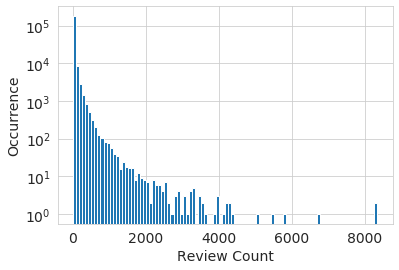

In [12]:
### Plot the histogram of the review counts
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

In [13]:
biz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 14 columns):
address         192609 non-null object
attributes      163773 non-null object
business_id     192609 non-null object
categories      192127 non-null object
city            192609 non-null object
hours           147779 non-null object
is_open         192609 non-null int64
latitude        192609 non-null float64
longitude       192609 non-null float64
name            192609 non-null object
postal_code     192609 non-null object
review_count    192609 non-null int64
stars           192609 non-null float64
state           192609 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 20.6+ MB


In [16]:
### Generate 20 random integers uniformly between 0 and 99
small_counts = np.random.randint(0, 100, 20)
small_counts

array([65, 14,  2, 91, 78,  1, 37, 17, 40, 86, 11, 42, 55, 89, 48, 75, 89,
       38, 59, 63])

In [17]:
np.floor_divide(small_counts, 10)

array([6, 1, 0, 9, 7, 0, 3, 1, 4, 8, 1, 4, 5, 8, 4, 7, 8, 3, 5, 6])

In [18]:
### An array of counts that span several magnitudes
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 44, 28, 7971, 926, 122, 22222]

In [19]:
### Map to exponential-width bins via the log function
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

In [22]:
pd.qcut(small_counts,5)

[(60.6, 79.6], (0.999, 16.4], (0.999, 16.4], (79.6, 91.0], (60.6, 79.6], ..., (60.6, 79.6], (79.6, 91.0], (16.4, 41.2], (41.2, 60.6], (60.6, 79.6]]
Length: 20
Categories (5, interval[float64]): [(0.999, 16.4] < (16.4, 41.2] < (41.2, 60.6] < (60.6, 79.6] < (79.6, 91.0]]